In [20]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
import os # Used to interact with the file system

Loading all of Data 8, CS 10, and CS major data from 2015-2019.

In [3]:
sp07_17 = pd.read_csv("uc.berkeley.stem.pathways.2007.2017.txt", sep="\t", low_memory=False)
intended_cs = sp07_17[sp07_17['major.intended.department'] == 'L&S Computer Science']
d8_ppsk2015_2019 = pd.read_csv("d8_ppsk2015_2019", low_memory=False)
cs10_ppsk2015_2019 = pd.read_csv("cs10_ppsk2015_2019",low_memory=False)
d8_2015 = pd.read_csv("d8_2015", low_memory=False)
d8_2016 = pd.read_csv("d8_2016", low_memory=False)
d8_2017 = pd.read_csv("d8_2017", low_memory=False)
d8_fa2018 = pd.read_csv("d8_fa2018", low_memory=False)
d8_sp2018 = pd.read_csv("d8_sp2018", low_memory=False)
d8_sp2019 = pd.read_csv("d8_sp2019", low_memory=False)
cs10_sp2018 = pd.read_csv("cs10_sp2018", low_memory=False)
cs10_sp2019 = pd.read_csv("cs10_sp2019", low_memory=False)
cs10_2015 = pd.read_csv("cs10_2015", low_memory=False)
cs10_2016 = pd.read_csv("cs10_2016", low_memory=False)
cs10_2017 = pd.read_csv("cs10_2017", low_memory=False)
cs10_fa2018 = pd.read_csv("cs10_fa2018", low_memory=False)
cs10_fa2019 = pd.read_csv("cs10_fa2019", low_memory=False)

In [4]:
d8_ppsk2015_2019 = d8_ppsk2015_2019.rename(columns={'0': 'ppsk'})
sp07_17

,ppsk,count,year,term,entry,residency,gender,ethnic.l1,ethnic.l2,ethnic.l3,...,degree.department.2,degree.major.2,degree.college.3,degree.division.3,degree.department.3,degree.major.3,degree.college.4,degree.division.4,degree.department.4,degree.major.4
0,1023906,1,2011,Fall,ADVANCED STANDING,Resident,Female,Underrepresented Minority,African American,African American/Black,...,"Env Sci, Policy, & Mgmt",Conserv & Resource Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161295,1,2015,Fall,ADVANCED STANDING,Resident,Male,White/Other,White,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,183848,1,2010,Spring,ADVANCED STANDING,Resident,Male,White/Other,White,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,232294,1,2009,Fall,ADVANCED STANDING,Resident,Female,White/Other,Other/Decline to State,Decline to State,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225526,1,2010,Fall,ADVANCED STANDING,Resident,Female,White/Other,White,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80503,2854707,1,2016,Fall,NEW FRESHMEN,Nonresident,Male,International,International,International,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80504,2855617,1,2016,Fall,NEW FRESHMEN,Resident,Female,Underrepresented Minority,African American,African American/Black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80505,2855618,1,2016,Fall,ADVANCED STANDING,Nonresident,Male,International,International,International,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80506,2855940,1,2016,Fall,ADVANCED STANDING,Resident,Male,Underrepresented Minority,Chicano/Latino,Mexican American/Chicano,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfs_to_merge = [d8_2015, d8_2016, d8_2017, d8_fa2018, d8_sp2018, d8_sp2019, cs10_sp2018, 
               cs10_sp2019, cs10_2015, cs10_2016, cs10_2017, cs10_fa2018, cs10_fa2018]

## Looking at Prior Experience Impact on Intended/Declared CS Majors

The plots below visualize how intended CS majors are correlated with higher HS unweighted GPA, SAT Score, and API Score. Ultimately, they show how the likelihood of someone intending to pursue computer science when they come to college is much higher for those with higher GPAs and test scores, as well as those who went to historically stronger high schools.

This plot shows the number of intended CS majors, grouped by high school unweighted GPA. We find that the number of intended CS majors increases significantly as GPA increases.

Text(0, 0.5, 'Number of Intended CS majors')

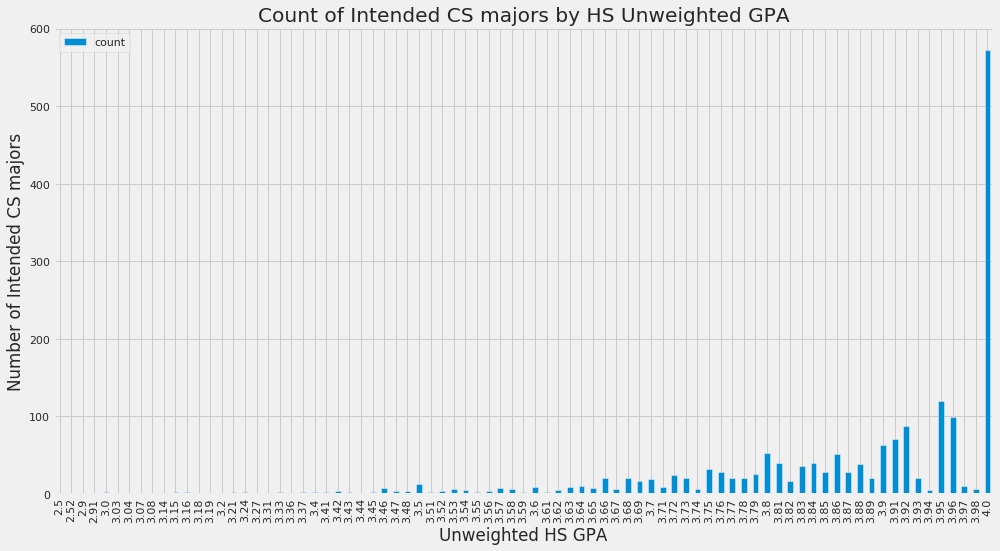

In [6]:
grouped = intended_cs.groupby(['hs.gpa.unweighted']).agg(sum)
ax = grouped.plot(y='count', kind='bar', figsize=[15,8])
# ax.set_xticklabels([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0])
ax.set_title("Count of Intended CS majors by HS Unweighted GPA")
ax.set_xlabel('Unweighted HS GPA')
ax.set_ylabel('Number of Intended CS majors')

The plot below groups the count of intended CS majors by SAT Score, showing a relationship between higher SAT scores and the number of intended CS majors.

Text(0, 0.5, 'Number of Intended CS majors')

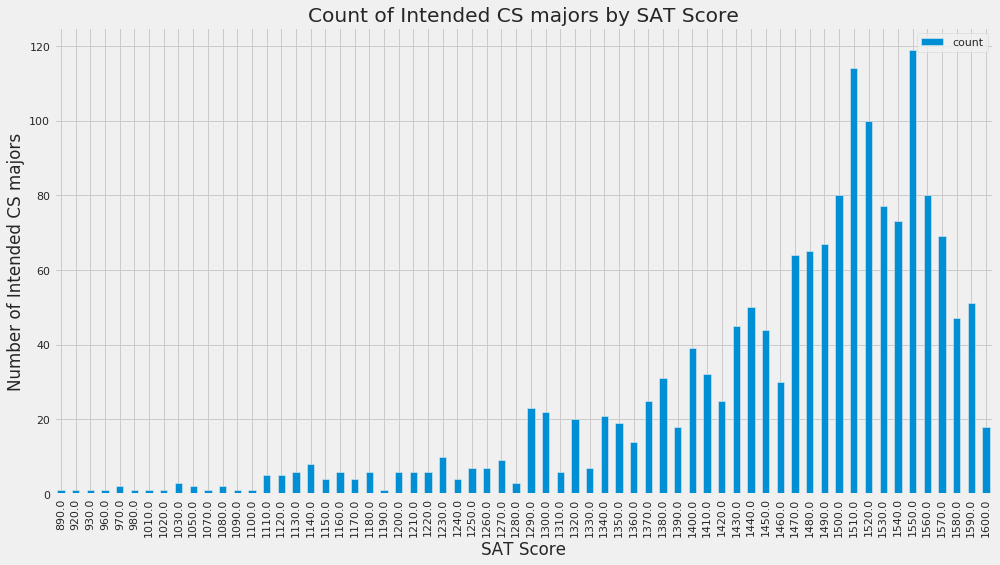

In [7]:
grouped_sat = intended_cs.groupby(['sat.total']).agg(sum)
ax = grouped_sat.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Intended CS majors by SAT Score")
ax.set_xlabel('SAT Score')
ax.set_ylabel('Number of Intended CS majors')

The plot below groups the count of intended CS majors by HS API Scores, showing a relationship between higher API scores and the number of intended CS majors.

Text(0, 0.5, 'Number of Intended CS majors')

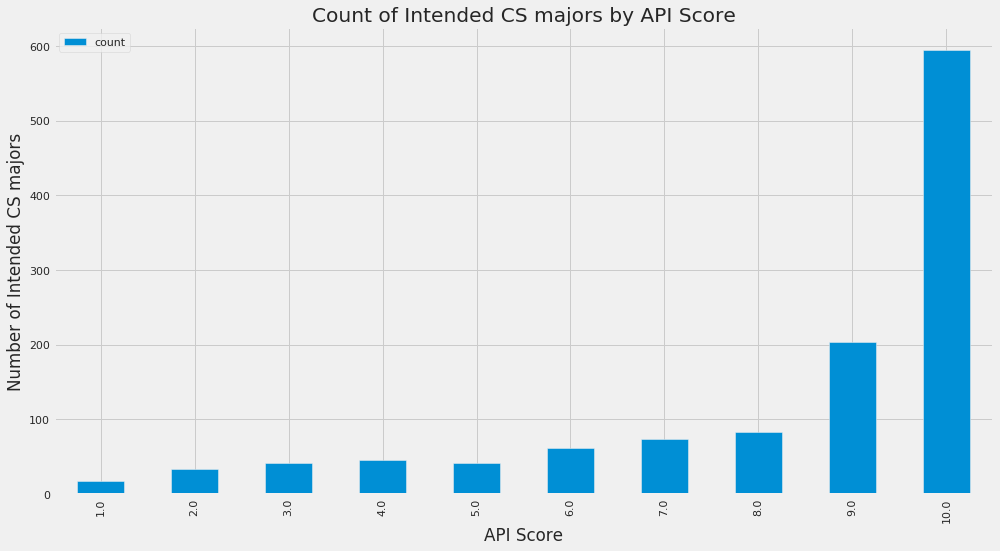

In [8]:
grouped_api = intended_cs.groupby(['hs.api']).agg(sum)
ax = grouped_api.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Intended CS majors by API Score")
ax.set_xlabel('API Score')
ax.set_ylabel('Number of Intended CS majors')

The plot below groups the count of declared CS majors by HS API Scores from 2007-2017, showing a relationship between higher API scores and the number of declared CS majors.

Text(0, 0.5, 'Number of Declared CS majors')

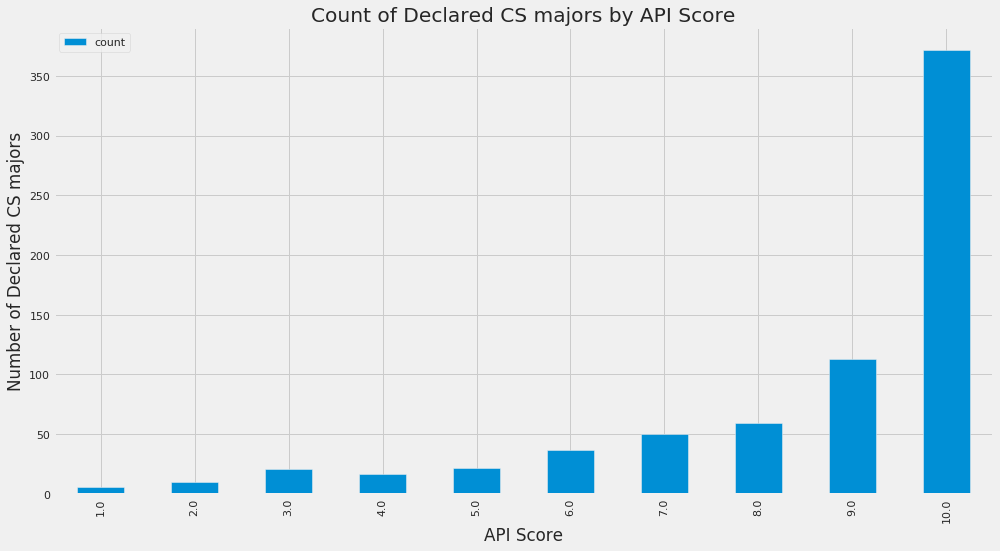

In [9]:
declared_cs_first = sp07_17[sp07_17['first.major.major.1'] == 'Computer Science']
grouped_api_d = declared_cs_first.groupby(['hs.api']).agg(sum)
ax = grouped_api_d.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Declared CS majors by API Score")
ax.set_xlabel('API Score')
ax.set_ylabel('Number of Declared CS majors')

In [10]:
grouped_api_d = grouped_api_d.rename(columns={'count': 'declared count'})
grouped_api = grouped_api.rename(columns={'count': 'intended count'})
result = pd.concat([grouped_api, grouped_api_d])

The graph below shows how the number of intended and declared CS majors is very much correlated with increasing high school API. *The API was discontinued in 2014 and has been replaced by the California School Dashboard. The API was a number, used for school accountability purposes, summarizing the performance of a group of students, a school, or a district on California’s standardized tests.* 

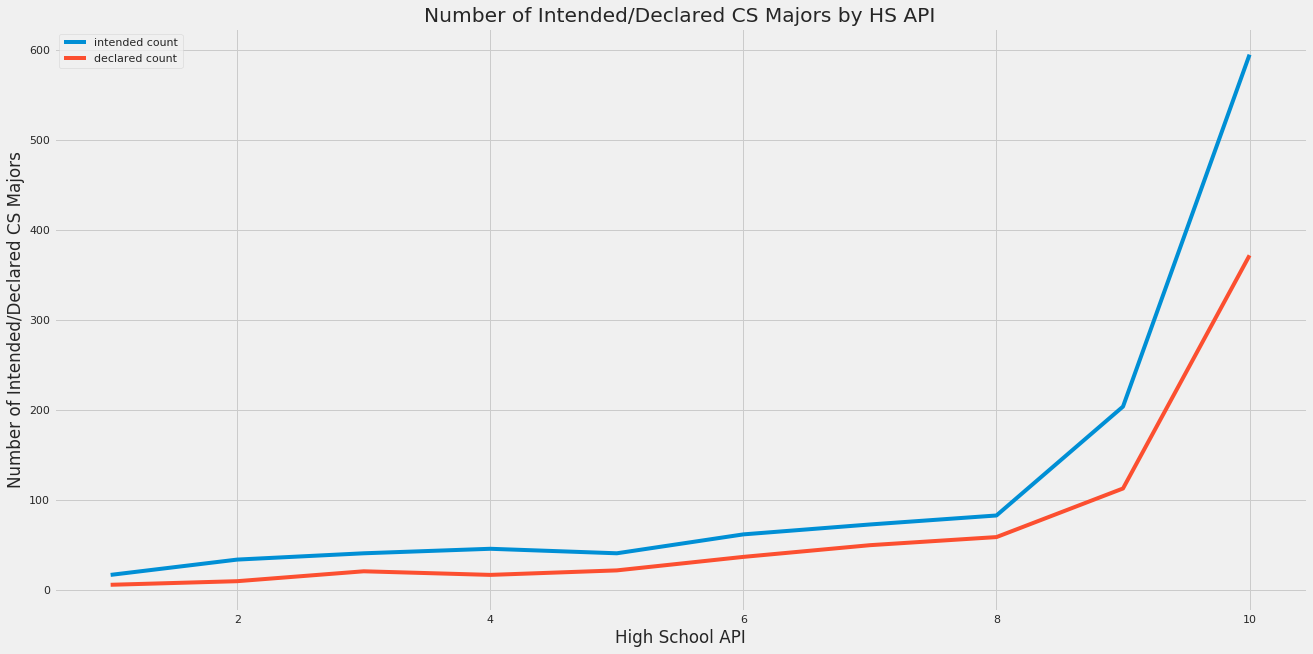

In [19]:
# plt.figure(figsize=(20,10))
hs_api = result.plot( y=['intended count', 'declared count'])
plt.xlabel('High School API')
plt.ylabel("Number of Intended/Declared CS Majors")
plt.title("Number of Intended/Declared CS Majors by HS API")
plt.gcf().set_size_inches(20, 10)
plt.show();

The plot below groups the count of intended CS majors by ACT Composite Scores, showing a relationship between higher ACT scores and the number of intended CS majors.

Text(0, 0.5, 'Number of Intended CS majors')

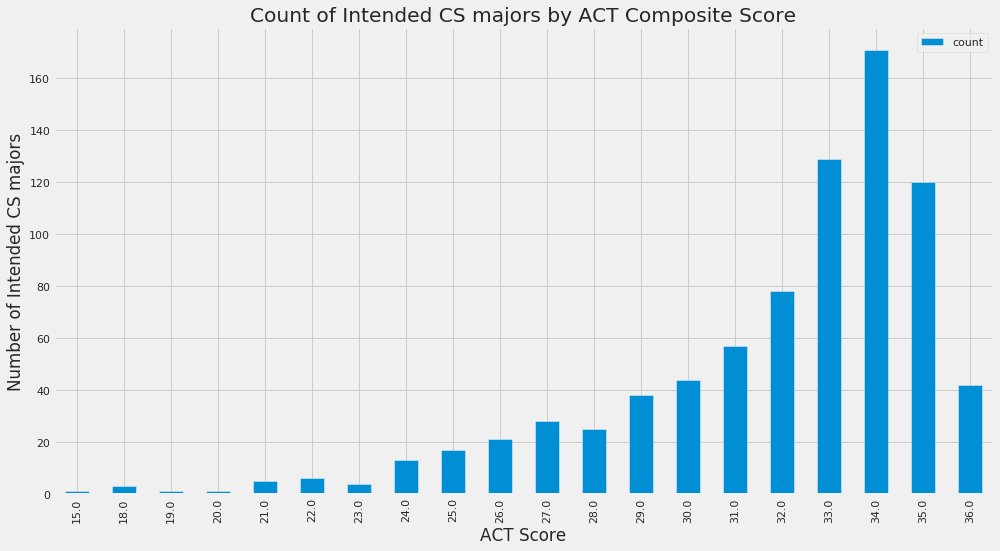

In [10]:
grouped_act = intended_cs.groupby(['act.composite']).agg(sum)
ax = grouped_act.plot(y='count', kind='bar', figsize=[15,8])
ax.set_title("Count of Intended CS majors by ACT Composite Score")
ax.set_xlabel('ACT Score')
ax.set_ylabel('Number of Intended CS majors')